In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 23) 
mpl.rc('ytick', labelsize = 23)

In [8]:
# suppress warning outputs for using lal in jupuyter notebook
import warnings 
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import GWFish.modules as gw

In [9]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#eba75f'
my_color2_darker = '#f6b26b'

In [10]:
PATH_TO_DATA = '/Users/ulyanadupletsa/Documents/PhDThesisData/Bilby4GWFish/'

In [12]:
parameters = pd.read_hdf(PATH_TO_DATA + 'CBC_pop_15plus30.hdf5')
parameters

,mass_1_source,mass_2_source,redshift,luminosity_distance,dec,ra,theta_jn,psi,phase,a_1,a_2,tilt_1,tilt_2,phi_12,phi_jl,geocent_time
11047,30.0,15.0,0.097859,452.844073,-0.282183,3.026396,1.142526,4.551976,1.098441,0.728859,0.620466,0.0,0.0,0.0,0.0,1.124867e+09


In [18]:
waveform_model1 = 'TaylorF2'
waveform_model2 = 'IMRPhenomD'
waveform_model3 = 'IMRPhenomXPHM'

In [58]:
my_fontsize = 25
colors = ['#e76f51', '#eba75f', '#2f4f4f']

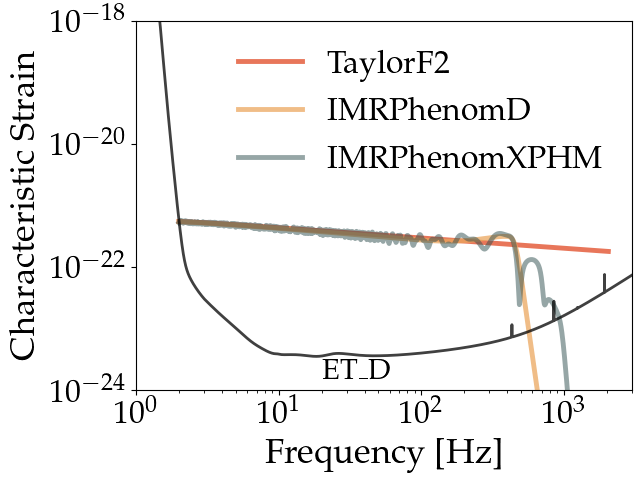

In [62]:
# Choose the detector onto which you want to project the signal
detector = 'ET'

# The following function outputs the signal projected onto the chosen detector
signal1, _ = gw.utilities.get_fd_signal(parameters, detector, waveform_model1)
signal2, _ = gw.utilities.get_fd_signal(parameters, detector, waveform_model2)
signal3, _ = gw.utilities.get_fd_signal(parameters, detector, waveform_model3)

frequency = gw.detection.Detector(detector).frequencyvector[:, 0]
# add the detector's sensitivity curve and plot the characteristic strain
psd_data = gw.utilities.get_detector_psd(detector)
# psd_data is a dictionary with the keys 'frequency' and 'psd'

plt.loglog(frequency, 2 * frequency * np.abs(signal1[:, 0]), label='%s' %waveform_model1, color=colors[0], linewidth=3.5, alpha=0.95)
plt.loglog(frequency, 2 * frequency * np.abs(signal2[:, 0]), label='%s' %waveform_model2, color=colors[1], linewidth=3.5, alpha=0.75)
plt.loglog(frequency, 2 * frequency * np.abs(signal3[:, 0]), label='%s' %waveform_model3, color=colors[2], linewidth=3.5, alpha=0.5)
plt.loglog(psd_data[:, 0], np.sqrt(psd_data[:, 0] * psd_data[:, 1]), color='black', linewidth=2, alpha=0.75)
# annotate text
plt.text(20, 1.5*1e-24, 'ET_D', fontsize=21, color='black')
plt.legend(fontsize=23, frameon=False)
plt.ylim(1e-24, 1e-18)
plt.xlim(1, 3000)
plt.xlabel('Frequency [Hz]', fontsize=my_fontsize)
plt.ylabel('Characteristic Strain', fontsize=my_fontsize)
plt.savefig('plots/waveform_cfr.pdf', bbox_inches='tight')
plt.show()